In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import skew, kurtosis
import yfinance as yf


In [2]:
results_comb_2min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/results_portfolio_combined_log_ret_ex_update_2min_v2.csv")
pnl_comb_2min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/pnl_portfolio_combined_log_ret_ex_update_2min_v2.csv")
counts_comb_2min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/counts_portfolio_combined_log_ret_ex_update_2min_v2.csv")

results_comb_30s = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/results_portfolio_combined_log_ret_ex_update_30S_v2.csv")
pnl_comb_30s = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/pnl_portfolio_combined_log_ret_ex_update_30S_v2.csv")
counts_comb_30s = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/counts_portfolio_combined_log_ret_ex_update_30S_v2.csv")

results_comb_10min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/results_portfolio_combined_log_ret_ex_update_10min_v2.csv")
pnl_comb_10min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/pnl_portfolio_combined_log_ret_ex_update_10min_v2.csv")
counts_comb_10min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/counts_portfolio_combined_log_ret_ex_update_10min_v2.csv")


results_ib_2min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/results_portfolio_iceberg_log_ret_ex_update_2min_v2.csv")
pnl_ib_2min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/pnl_portfolio_iceberg_log_ret_ex_update_2min_v2.csv")
counts_ib_2min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/counts_portfolio_iceberg_log_ret_ex_update_2min_v2.csv")

results_ib_30s = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/results_portfolio_iceberg_log_ret_ex_update_30S_v2.csv")
pnl_ib_30s = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/pnl_portfolio_iceberg_log_ret_ex_update_30S_v2.csv")
counts_ib_30s = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/counts_portfolio_iceberg_log_ret_ex_update_30S_v2.csv")

results_ib_10min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/results_portfolio_iceberg_log_ret_ex_update_10min_v2.csv")
pnl_ib_10min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/pnl_portfolio_iceberg_log_ret_ex_update_10min_v2.csv")
counts_ib_10min = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/counts_portfolio_iceberg_log_ret_ex_update_10min_v2.csv")
results_comb_2min.set_index("date", inplace=True)
results_comb_30s.set_index("date", inplace=True)
results_comb_10min.set_index("date", inplace=True)

results_ib_2min.set_index("date", inplace=True)
results_ib_30s.set_index("date", inplace=True)
results_ib_10min.set_index("date", inplace=True)

In [3]:
# Verify results match between individual PnL and results PnL
sum(pnl_comb_2min.groupby("date")['top_pnl'].sum() - pnl_comb_2min.groupby("date")['bottom_pnl'].sum() - results_comb_2min['PnL'])
sum(pnl_comb_30s.groupby("date")['top_pnl'].sum() - pnl_comb_30s.groupby("date")['bottom_pnl'].sum() - results_comb_30s['PnL'])
sum(pnl_comb_10min.groupby("date")['top_pnl'].sum() - pnl_comb_10min.groupby("date")['bottom_pnl'].sum() - results_comb_10min['PnL'])

sum(pnl_ib_2min.groupby("date")['top_pnl'].sum() - pnl_ib_2min.groupby("date")['bottom_pnl'].sum() - results_ib_2min['PnL'])
sum(pnl_ib_30s.groupby("date")['top_pnl'].sum() - pnl_ib_30s.groupby("date")['bottom_pnl'].sum() - results_ib_30s['PnL'])
sum(pnl_ib_10min.groupby("date")['top_pnl'].sum() - pnl_ib_10min.groupby("date")['bottom_pnl'].sum() - results_ib_10min['PnL'])

3.2659964142867093e-15

In [4]:
results_lst = [results_comb_30s, results_comb_2min, results_comb_10min, results_ib_30s, results_ib_2min, results_ib_10min]
pnl_lst = [pnl_comb_30s, pnl_comb_2min, pnl_comb_10min, pnl_ib_30s, pnl_ib_2min, pnl_ib_10min,]
counts_lst = [counts_comb_30s, counts_comb_2min, counts_comb_10min, counts_ib_30s, counts_ib_2min, counts_ib_10min]



label_lst = ['HidLit 30s', 'HidLit 2min', 'HidLit 10min',
             'VHI 30s', 'VHI 2min', 'VHI 10min']

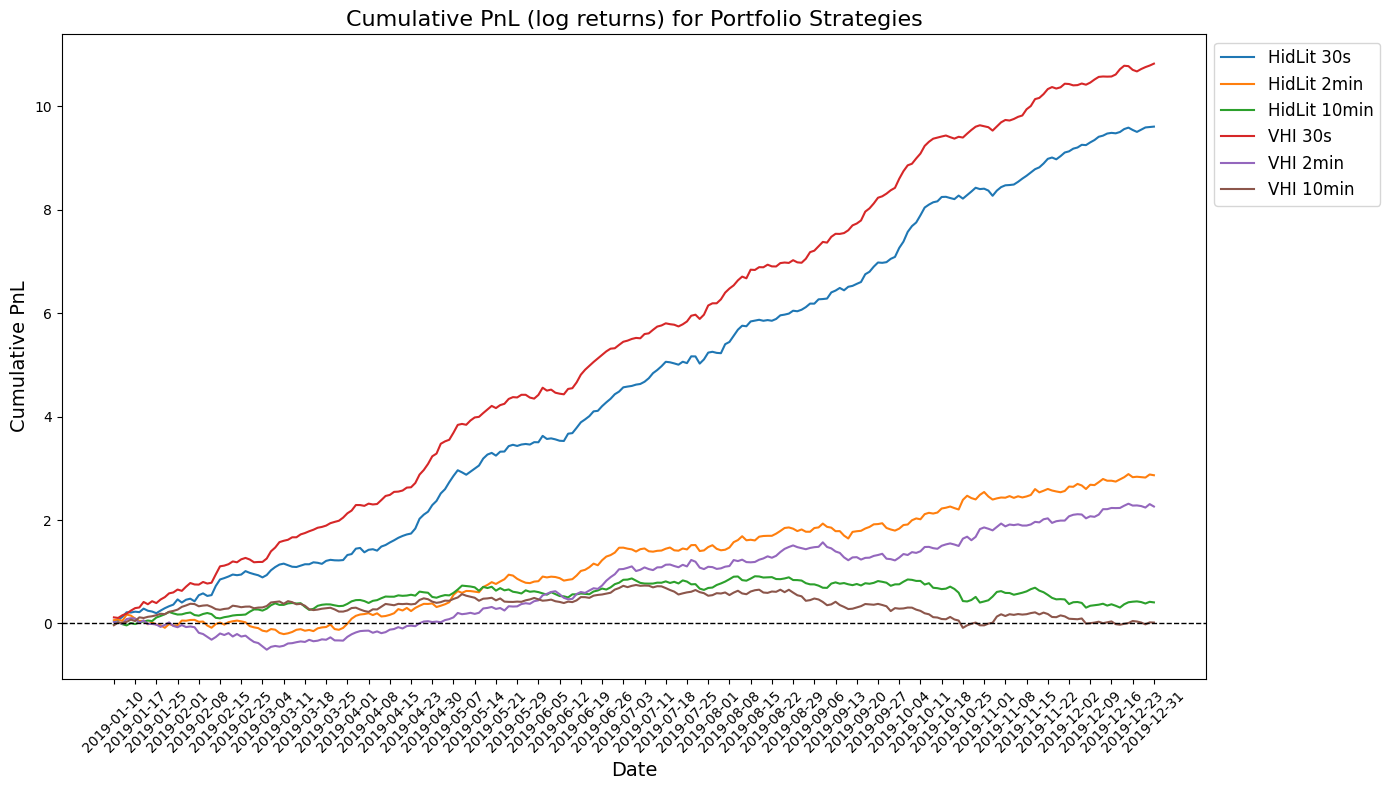

In [5]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))


for results, label in zip(results_lst, label_lst):
    cumulative_pnl = results['PnL'].cumsum().to_frame()
    plt.plot(cumulative_pnl.index, cumulative_pnl['PnL'], label=label)


plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Add title and labels
plt.title('Cumulative PnL (log returns) for Portfolio Strategies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative PnL', fontsize=14)

# Rotate x-axis labels and reduce ticks
plt.xticks(ticks=range(0, len(cumulative_pnl.index), 5), labels=cumulative_pnl.index[::5], rotation=45)


# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

In [6]:
def sharpe_test(returns, count_df):
    # Calculate the Sharpe ratio
    sharpe_ratio = np.mean(returns) / np.std(returns, ddof=1)
    
    # Number of observations
    T = len(returns)
    
    # Calculate skewness and kurtosis
    g3 = skew(returns)
    g4 = kurtosis(returns, fisher=False)  # fisher=False to match R's kurtosis (which includes the 3)
    
    # Calculate the modified Sharpe ratio statistic
    denominator = np.sqrt((1 - g3 * sharpe_ratio + (g4 - 1) * (sharpe_ratio ** 2) / 4) / (T - 1))
    modified_sharpe_stat = sharpe_ratio / denominator
    # Calculate the two-tailed p-value
    p_value = 2 * min(norm.cdf(modified_sharpe_stat), 1 - norm.cdf(modified_sharpe_stat))
    
    annual_sharpe = sharpe_ratio * np.sqrt(252)
    
    PPT = np.sum(returns) / (count_df[['top_counts', 'bottom_counts']].sum(axis=1).sum())
    
    return annual_sharpe, PPT, modified_sharpe_stat, p_value

In [7]:
sharpe_lst = []
SR_test_lst = []
pval_lst = []
ppt_lst = []


for result, counts in zip(results_lst, counts_lst):
    annual_sharpe, PPT, sharpe_stat, p_val = sharpe_test(result['PnL'], counts)
    sharpe_lst.append(annual_sharpe)
    ppt_lst.append(PPT)
    SR_test_lst.append(sharpe_stat)
    pval_lst.append(p_val)

sharpe_df = pd.DataFrame({'Portfolio': label_lst, 'Annual SR': sharpe_lst, 'PPT': ppt_lst,
                          'SR_statistic': SR_test_lst, 'pval': pval_lst})
sharpe_df.sort_values(by='Annual SR', ascending=False, inplace=True)
sharpe_df

,Portfolio,Annual SR,PPT,SR_statistic,pval
3,VHI 30s,13.432316,6.812335e-06,12.654737,0.000000
0,HidLit 30s,11.577797,6.058933e-06,10.504177,0.000000
1,HidLit 2min,3.809941,7.255474e-06,3.794972,0.000148
4,VHI 2min,3.201797,5.688258e-06,3.127657,0.001762
2,HidLit 10min,0.691390,5.275602e-06,0.673642,0.500539
5,VHI 10min,0.032850,2.244117e-07,0.032381,0.974168


## Analysis by Ticker

In [13]:
ticker_pnl_lst = []

for df_pnl in pnl_lst:
    ticker_result = df_pnl.groupby("ticker")[['top_pnl', 'bottom_pnl']].sum()
    ticker_pnl = ticker_result['top_pnl'] - ticker_result['bottom_pnl']
    ticker_pnl_lst.append(ticker_pnl)

In [17]:
ticker_pnl_lst[0]

ticker
AES    -0.012230
ALB     0.311154
AOS     0.162214
APA     0.042656
BEN     0.223383
BXP     0.184865
CPB     0.294559
DVA     0.394082
FFIV    1.415180
FRT    -0.077440
HII     0.518401
HRL     0.377179
HSIC    0.682116
INCY    0.999715
MHK     0.356821
NWSA    1.536711
PNW     0.409596
RL      0.586183
TAP    -0.060457
WYNN    1.259975
dtype: float64

In [32]:
ticker_pnl_lst_comb = ticker_pnl_lst[:3]
ticker_pnl_lst_ib = ticker_pnl_lst[3:]

label_comb = label_lst[:3]
label_ib = label_lst[3:]

In [33]:
ticker_pnl_lst_comb[0].sort_values(ascending=False, inplace=True)
ticker_pnl_lst_ib[0].sort_values(ascending=False, inplace=True)

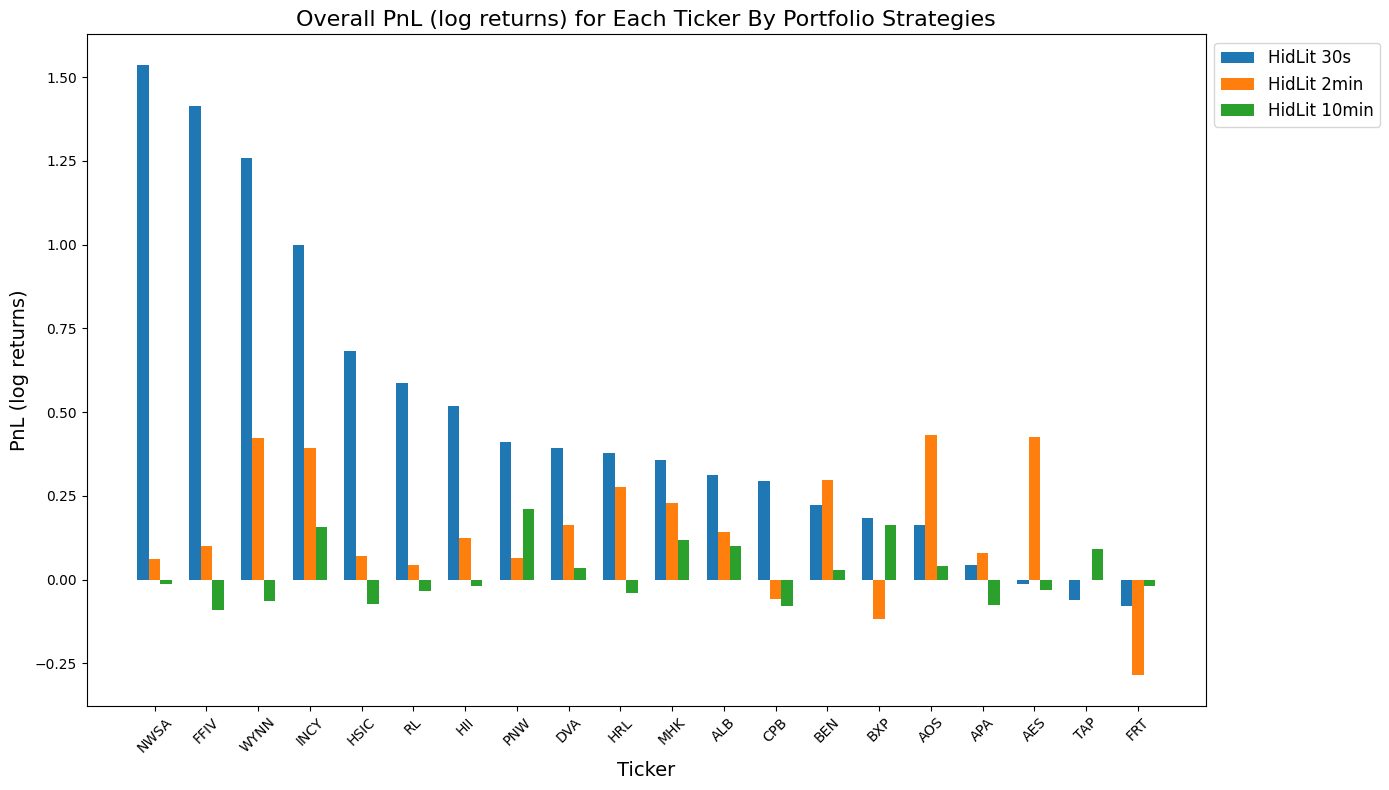

In [34]:
# Assuming ticker_pnl_lst is a list of Series and label_lst is a list of labels corresponding to each series

# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))

# Number of series
n_series = len(ticker_pnl_lst_comb)
# Number of tickers
tickers = ticker_pnl_lst_comb[0].index
n_tickers = len(tickers)

# Set width of bars
bar_width = 0.2
# Increase the gap between tickers
gap = 0.3
# Positions of bars on x-axis for each ticker with additional gap
x = np.arange(n_tickers) * (n_series * bar_width + gap)

# Plot each series as a bar with an offset
for i, (pnl_ticker, label) in enumerate(zip(ticker_pnl_lst_comb, label_comb)):
    plt.bar(x + i * bar_width, pnl_ticker.values, width=bar_width, label=label)

# Add title and labels
plt.title('Overall PnL (log returns) for Each Ticker By Portfolio Strategies', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('PnL (log returns)', fontsize=14)

# Set x-ticks to the center of the grouped bars
plt.xticks(x + bar_width * (n_series - 1) / 2, tickers, rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()


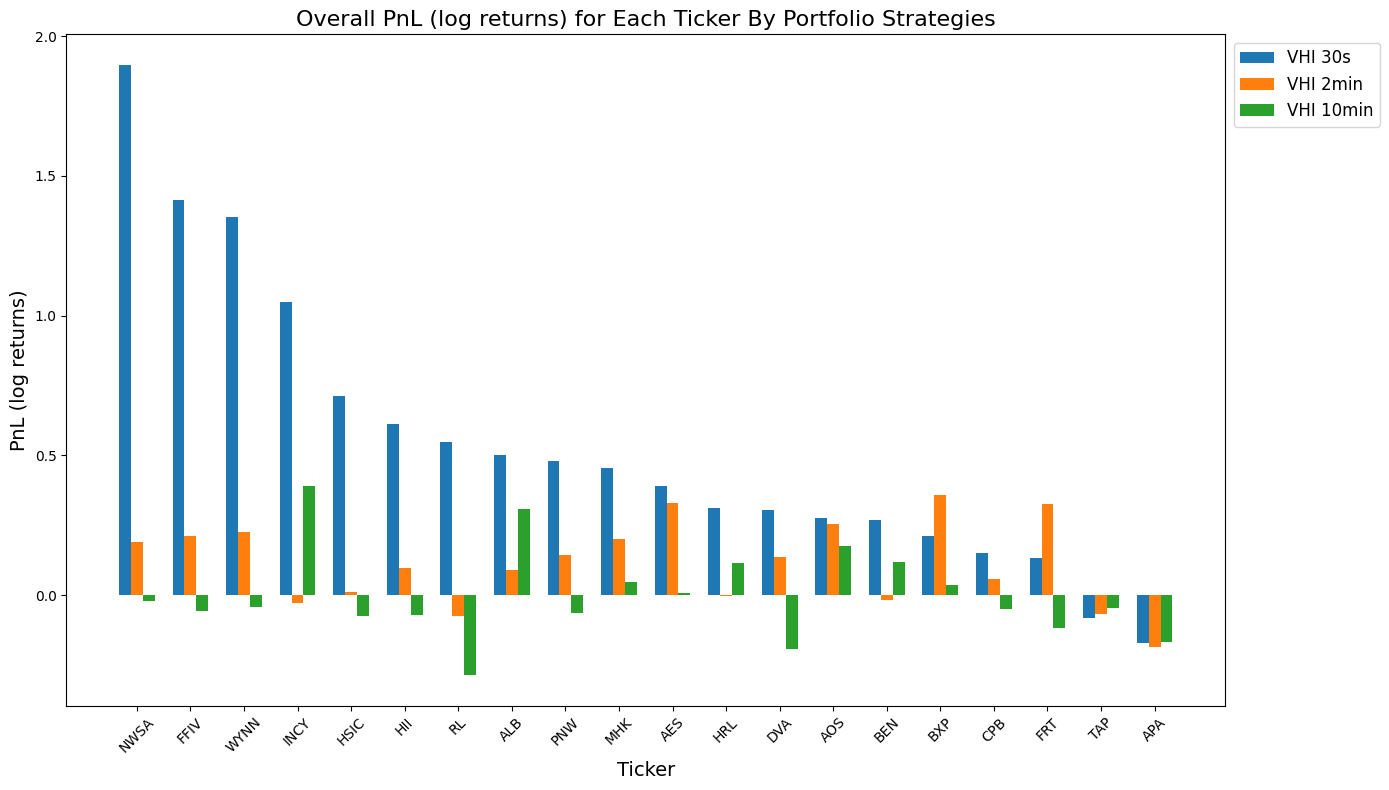

In [36]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))

# Number of series
n_series = len(ticker_pnl_lst_ib)
# Number of tickers
tickers = ticker_pnl_lst_ib[0].index
n_tickers = len(tickers)

# Set width of bars
bar_width = 0.2
# Increase the gap between tickers
gap = 0.3
# Positions of bars on x-axis for each ticker with additional gap
x = np.arange(n_tickers) * (n_series * bar_width + gap)

# Plot each series as a bar with an offset
for i, (pnl_ticker, label) in enumerate(zip(ticker_pnl_lst_ib, label_ib)):
    plt.bar(x + i * bar_width, pnl_ticker.values, width=bar_width, label=label)

# Add title and labels
plt.title('Overall PnL (log returns) for Each Ticker By Portfolio Strategies', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('PnL (log returns)', fontsize=14)

# Set x-ticks to the center of the grouped bars
plt.xticks(x + bar_width * (n_series - 1) / 2, tickers, rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

## Consider Betsizes

In [38]:
ticker_lst = ['AES', 'ALB', 'AOS', 'APA', 'BEN', 'BXP', 'CPB',
                'DVA', 'FFIV', 'FRT', 'HII', 'HRL', 'HSIC', 'INCY',
                'MHK', 'NWSA', 'PNW', 'RL', 'TAP', 'WYNN']

In [42]:

# Define the ticker symbol and the time period
start_date = "2018-01-01"
end_date = "2018-12-31"

avg_USD_vol_lst = []

# Download the historical data for the ticker
for ticker in ticker_lst:
    data = yf.download(ticker, start=start_date, end=end_date)
    # Calculate the USD traded volume (Volume * Close Price)
    data['USD Traded Volume'] = data['Volume'] * data['Close']
    # Calculate the median USD traded volume
    median_usd_traded_volume = data['USD Traded Volume'].median()
    avg_USD_vol_lst.append(median_usd_traded_volume)

ticker_USD_vol = pd.DataFrame({'ticker': ticker_lst, 'avg_USD_vol': avg_USD_vol_lst})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [46]:
B_t = ticker_USD_vol['avg_USD_vol'].sum()

In [48]:
pnl_lst[0]

,ticker,top_pnl,bottom_pnl,date
0,AES,0.003272,0.005742,2019-01-10
1,ALB,-0.000298,0.001695,2019-01-10
2,AOS,-0.000542,-0.002923,2019-01-10
3,APA,-0.002359,0.005303,2019-01-10
4,BEN,0.003697,-0.011836,2019-01-10
...,...,...,...,...
4914,NWSA,-0.003179,0.000000,2019-12-31
4915,PNW,-0.002298,-0.000050,2019-12-31
4916,RL,-0.001897,0.000600,2019-12-31
4917,TAP,0.001974,-0.001646,2019-12-31


In [54]:
pnl_ticker_betsize_lst = []

for pnl, counts in zip(pnl_lst, counts_lst):
    pnl_ticker = pnl.groupby('ticker')[['top_pnl', 'bottom_pnl']].sum()
    pnl_ticker = pnl_ticker.merge(ticker_USD_vol, left_on='ticker', right_on='ticker', how='left')
    pnl_ticker['PnL_betsize'] = (pnl_ticker['top_pnl'] - pnl_ticker['bottom_pnl']) * 0.001 * pnl_ticker['avg_USD_vol']
    pnl_ticker_betsize_lst.append(pnl_ticker)

In [73]:
pnl_betsize = []

for pnl, counts in zip(pnl_lst, counts_lst):
    pnl = pnl.merge(ticker_USD_vol, left_on='ticker', right_on='ticker')
    pnl['PnL'] = (pnl['top_pnl'] - pnl['bottom_pnl']) * 0.001 * pnl['avg_USD_vol']
    pnl_daily = pnl.groupby('date')[['PnL']].sum()

    counts = counts.merge(ticker_USD_vol, left_on='ticker', right_on='ticker')
    counts['B_t_ticker'] = (counts['top_counts'] + counts['bottom_counts']) * counts['avg_USD_vol']
    counts_daily = counts.groupby('date')[['B_t_ticker']].sum()

    pnl_betsize.append(pnl_daily['PnL'].sum() / counts_daily['B_t_ticker'].sum())

pnl_betsize_by_strat = pd.DataFrame({'Strategy': label_lst, 'PPD': pnl_betsize})

In [74]:
pnl_betsize_by_strat

,Strategy,PPD
0,HidLit 30s,6.420589e-09
1,HidLit 2min,3.871871e-09
2,HidLit 10min,5.785923e-09
3,VHI 30s,6.910793e-09
4,VHI 2min,2.919552e-09
5,VHI 10min,-2.682794e-09
